In [2]:
pip install trimesh

     -------------------------------------- 685.4/685.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\eddyd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import trimesh
import os

In [34]:
# создаём список из названий файлов в директории 3д моделей
for root, dirs, files in os.walk(r'C:\Users\eddyd\Downloads\Praktikum\Хакатон_ХБ\3d_to_2ds\3d_files'):
    filenames = []
    for file in files:
        filename = os.path.join(root, file)
        if not os.path.exists(filename):
            continue
        filenames.append(filename)
    print(filenames)

['C:\\Users\\eddyd\\Downloads\\Praktikum\\Хакатон_ХБ\\3d_to_2ds\\3d_files\\10290_Fork_v2_iterations-2.obj', 'C:\\Users\\eddyd\\Downloads\\Praktikum\\Хакатон_ХБ\\3d_to_2ds\\3d_files\\spoon.obj']


In [38]:
# создаём список названий файлов без пути и без расширения в директории 3д моделей
filenames_short = []
# перебираем все элементы списка filenames
for elem in filenames:
# удаляем три последних символа и точку
    elem = elem[:-4]
    print("Название без расширения", elem)
# находим индекс последнего символа \\
    index_symbol = elem.rfind("\\") + 1
    print("Позиция резделителя", index_symbol)
    # срезаем лишнее, включая разделитель
    elem = elem[index_symbol:]
    print(elem)
    filenames_short.append(elem)
print(filenames_short)

Название без расширения C:\Users\eddyd\Downloads\Praktikum\Хакатон_ХБ\3d_to_2ds\3d_files\10290_Fork_v2_iterations-2
Позиция резделителя 65
10290_Fork_v2_iterations-2
Название без расширения C:\Users\eddyd\Downloads\Praktikum\Хакатон_ХБ\3d_to_2ds\3d_files\spoon
Позиция резделителя 65
spoon
['10290_Fork_v2_iterations-2', 'spoon']


У нас есть два списка.  

filenames - полные пути файлов 3д моделей для считывания  

filenames_short - только названия файлов 3д моделей - мы будем использовать их для создания каталогов   

картинок 2д каждой модели

In [39]:
# Загружаем 3д модель из первого файла
model = trimesh.load(filenames[0])

In [40]:
# Создаем список углов поворота в градусах
angles = np.linspace(0, 360, 1000)

In [44]:
# Создаем папку для сохранения изображений
import os
os.mkdir("images")

KeyboardInterrupt: 

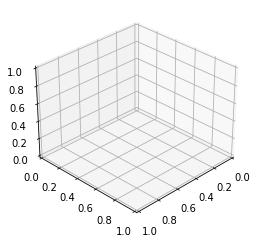

In [45]:
# Для каждого угла поворота
for i, angle in enumerate(angles):
    # Поворачиваем модель на заданный угол вокруг оси z
    model.apply_transform(trimesh.transformations.rotation_matrix(np.radians(angle), (0, 0, 1)))
    
    # Рендерим модель с помощью matplotlib
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=45) # Устанавливаем угол обзора камеры
    model.show(ax=ax) # Показываем модель на графике
    
    # Сохраняем изображение в папку с именем angle.png
    fig.savefig(f"images/{angle}.png")
    
    # Закрываем график
    plt.close(fig)